Trong phần này, ta sẽ xem xét các yếu tố ảnh hưởng đến thành công của phim (Revenue, Vote Average). Các biến được phân tích: Runtime, Genre, Country, Budget.
    

In [1]:
import pandas as pd
import sys
sys.path.append("../src") 
import clean_data

# 1. Đọc file, tổng quan
df = clean_data.DocFile('../src/movies_2009_2023.csv')
df.head()


,id,title,release_date,vote_average,vote_count,popularity,original_language,budget,revenue,runtime,status
0,259872,Skin. Like. Sun.,10/10/2009,6.100,111,44.9920,fr,0,0,60,Released
1,19995,Avatar,12/15/2009,7.593,32629,27.0592,en,237000000,2923706026,162,Released
2,14836,Coraline,2/5/2009,7.899,8547,20.2430,en,60000000,185860104,100,Released
3,16869,Inglourious Basterds,8/2/2009,8.215,23231,17.5855,en,70000000,321457747,153,Released
4,767,Harry Potter and the Half-Blood Prince,7/15/2009,7.682,20139,18.5378,en,250000000,933959197,153,Released


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 600 non-null    int64  
 1   title              600 non-null    object 
 2   release_date       600 non-null    object 
 3   vote_average       600 non-null    float64
 4   vote_count         600 non-null    int64  
 5   popularity         600 non-null    float64
 6   original_language  600 non-null    object 
 7   budget             600 non-null    int64  
 8   revenue            600 non-null    int64  
 9   runtime            600 non-null    int64  
 10  status             600 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 51.7+ KB


,id,vote_average,vote_count,popularity,budget,revenue,runtime
count,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02,6.000000e+02,600.000000
mean,3.593721e+05,6.686365,6379.650000,13.506734,6.710019e+07,2.844058e+08,108.258333
std,2.993840e+05,1.209511,7136.667853,10.850347,8.484540e+07,4.076573e+08,28.279518
min,1.890000e+02,0.000000,0.000000,6.108600,0.000000e+00,0.000000e+00,0.000000
25%,8.188750e+04,6.151500,109.000000,8.954825,0.000000e+00,0.000000e+00,92.000000
50%,3.241090e+05,6.800000,4305.500000,11.029450,2.800000e+07,9.975323e+07,106.500000
75%,5.296310e+05,7.416500,10055.750000,14.078850,1.100000e+08,4.146852e+08,124.000000
max,1.466016e+06,10.000000,37990.000000,161.015700,5.839000e+08,2.923706e+09,242.000000


1. Thông tin tổng quan:
   - Dataset có tổng cộng 600 phim với 11 cột thông tin
   - Kích thước Dataset tương đối nhỏ (~51.7 KB)
   - Các cột dữ liệu bao gồm:
     + Thông tin phim: id (mã phim)
                       title (Tiêu đề phim)
                       release_date (Ngày phát hành)
                       popularity (Mức độ phổ biến)
                       original_language (ngôn ngữ gốc)
                       runtime (Thời lượng phim) 
                       status (Trạng thái)
     + Tài chính: revenue (Doanh thu)
                  budget (Ngân sách/Vốn)
     + Đánh giá: vote_average (Điểm đánh giá trung bình)
                 vote_count (Tổng số lượt đánh giá)
2. Chất lượng dữ liệu
   - Dữ liệu thiếu (null/nan): Dataset hiện tại không có dữ liệu thiếu, nhưng vẫn còn chứa giá trị 0 (budget, revenue)
   - Vì chứa giá trị 0 nên dẫn đến sai sót trong quá trình phân tích
=> Cần làm sạch dữ liệu
3. Giá trị bất thường:
   - Budget và Revenue còn rất nhiều giá trị 0 (không hợp lý)
4. Thống kê chính
   - Điểm đánh giá trung bình (vote_average):
     + Có tổng cộng 600 lượt đánh giá
     + Trung bình mỗi phim được ~6.69 điểm.
     + 50% trong tổng số phim được điểm >=6.8 -> đa phần phim ở mức khá trở lên
   - Tổng số lượt đánh giá (vote_count):
     + Thấp nhất là 0 lượt và cao nhất là 37990 lượt -> Không có giới hạn của lượt đánh giá, nhưng có sự chênh lệch rất lớn giữa giá trị min và max -> ngoại lệ đã làm cho lượt đánh giá trung bình mỗi phim là ~6380
     + 50% trong tổng số phim có lượt đánh giá >4305.
   - Mức độ phổ biến (popularity):
     + Trung bình ~13.5
     + Max ~161 -> Phân bố lệch phải, một số ít phim rất hot
   - Ngân sách (budget)
     + Trung bình ~67 triệu USD
     + Max ~584 triệu
     + Nhiều phim có budget = 0
   - Doanh thu (revenue)
     + Trung binh ~284 triệu USD
     + Max ~2.9 tỷ USD
     + Nhiều phim có revenue = 0
   - Thời lượng (runtime)
     + Trung bình ~108 phút
     + Max ~242 phút
     + Có phim runtime = 0
5. Nhận xét
   - Dữ liệu lấy từ web khá sạch nhưng nhiều giá trị thiếu (ẩn dưới dạng 0)
   - Các cột budget và revenue có xu hướng lệch phải
   - Cột popularty phản ánh mức độ quan tâm theo thời điểm, phù hợp để phân tích theo trend nhưng dễ thay đổi theo ngày.

In [17]:
# Làm sạch dữ liệu
# Loại bỏ hoặc xử lý phim có budget = 0 hoặc revenue = 0 (vì sẽ gây méo phân tích).
df = df[(df['budget'] > 0) & (df['revenue'] > 0) & (df['runtime'] > 0)]

from descriptive_analysis import get_min, get_max, get_mean

# Trung bình, min, max của budget, revenue, runtime, popularity, vote_average
min_budget = get_min(df,'budget')
max_budget = get_max(df,'budget')
mean_budget = get_mean(df,'budget')

print(f"Ngân sách thấp nhất: {min_budget}")
print(f"Ngân sách cao nhất: {max_budget}")
print(f"Ngân sách trung bình: {mean_budget}")
print()

min_revenue = get_min(df,'revenue')
max_revenue = get_max(df,'revenue')
mean_revenue = get_mean(df,'revenue')

print(f"Doanh thu thấp nhất: {min_revenue}")
print(f"Doanh thu cao nhất: {max_revenue}")
print(f"Doanh thu trung bình: {mean_revenue}")
print()

min_runtime = get_min(df,'runtime')
max_runtime = get_max(df,'runtime')
mean_runtime = get_mean(df,'runtime')

print(f"Thời lượng thấp nhất: {min_runtime}")
print(f"Thời lượng cao nhất: {max_runtime}")
print(f"Thời lượng trung bình: {mean_runtime}")
print()

min_popularity = get_min(df,'popularity')
max_popularity = get_max(df,'popularity')
mean_popularity = get_mean(df,'popularity')

print(f"Độ phổ biến thấp nhất: {min_popularity}")
print(f"Độ phổ biến cao nhất: {max_popularity}")
print(f"Độ phổ biến trung bình: {mean_popularity}")
print()

min_vote_average = get_min(df,'vote_average')
max_vote_average = get_max(df,'vote_average')
mean_vote_average = get_mean(df,'vote_average')

print(f"Điểm đánh giá thấp nhất: {min_vote_average}")
print(f"Điểm đánh giá cao nhất: {max_vote_average}")
print(f"Điểm đánh giá trung bình: {mean_vote_average}")

Ngân sách thấp nhất: 22361
Ngân sách cao nhất: 583900000
Ngân sách trung bình: 107178573.55

Doanh thu thấp nhất: 3492
Doanh thu cao nhất: 2923706026
Doanh thu trung bình: 457017525.53

Thời lượng thấp nhất: 82
Thời lượng cao nhất: 206
Thời lượng trung bình: 119.37

Độ phổ biến thấp nhất: 6.292
Độ phổ biến cao nhất: 69.4581
Độ phổ biến trung bình: 12.36

Điểm đánh giá thấp nhất: 4.432
Điểm đánh giá cao nhất: 8.497
Điểm đánh giá trung bình: 7.04


In [27]:
# 2. Phân tích, thống kê
# 2.1 Ngôn ngữ gốc (original_language) ảnh hưởng đến doanh thu (revenue) và điểm đánh giá (vote_average)

# Nhóm theo original_language → xem ngôn ngữ nào có revenue/vote cao hơn
revenue_byoriginal_language = df.groupby('original_language')['revenue'].max()
vote_byoriginal_language = df.groupby('original_language')['vote_average'].max()
print(f"Doanh thu nhóm theo ngôn ngữ: {revenue_byoriginal_language}")
print(f"Điểm đánh giá nhóm theo ngôn ngữ: {vote_byoriginal_language}")



Doanh thu nhóm theo ngôn ngữ: original_language
cn      87965942
en    2923706026
fi      14281199
fr     426590315
ja     523542183
ko     257591776
sv        393824
tl        721651
zh     742718496
Name: revenue, dtype: int64
Điểm đánh giá nhóm theo ngôn ngữ: original_language
cn    6.900
en    8.461
fi    7.400
fr    8.271
ja    8.200
ko    8.497
sv    6.304
tl    5.200
zh    7.900
Name: vote_average, dtype: float64


* Nhận xét: Từ kết quả của 2 biến "revenue_byoriginal_language" và "vote_byoriginal_language", ta có thể rút ra một số nhận xét như sau:
- Phim dùng ngôn ngữ English chiếm doanh thu cao nhất (~2.9 tỷ USD), cho thấy thị trường phim tiếng anh vẫn là thị trường chính, dễ tiếp cận đông đảo khán giả ở Việt Nam nói riêng, và khán giả toàn cầu nói chung.
- Tuy nhiên, điểm đánh giá cao nhất lại thuộc về Korean (~8.497 điểm), chứng tỏ ngoài thị trường quốc tế, phim hàn cũng được đánh giá cao về chất lượng.
- Các ngôn ngữ khác như French (fr ~8.27 điểm), Japanese (ja ~8.2 điểm) cũng có điểm số trung bình tốt, dù doanh thu toàn cầu thấp hơn so với English. Điều này gợi ý rằng phim châu Âu và châu Á thường có “chất lượng nội dung” cao, nhưng hạn chế về quy mô thị trường phát hành.
- Tagalog (tl) và Swedish (sv) có điểm đánh giá trung bình thấp (~5–6 điểm), đồng thời doanh thu cũng rất hạn chế
-> phản ánh quy mô thị trường nội địa nhỏ và sức hút quốc tế kém.
  Tóm lại:
  - Ngôn ngữ ảnh hưởng rõ rệt đến cả doanh thu và điểm đánh giá.
  - Tiếng Anh: lợi thế về quy mô khán giả, doanh thu áp đảo.
  - Hàn, Pháp, Nhật: chất lượng cao, được khán giả đánh giá tốt.
  - Các ngôn ngữ ít phổ biến: cả doanh tu và điểm đánh giá đều thấp, hạn chế trong cạnh tranh quốc tế.
    

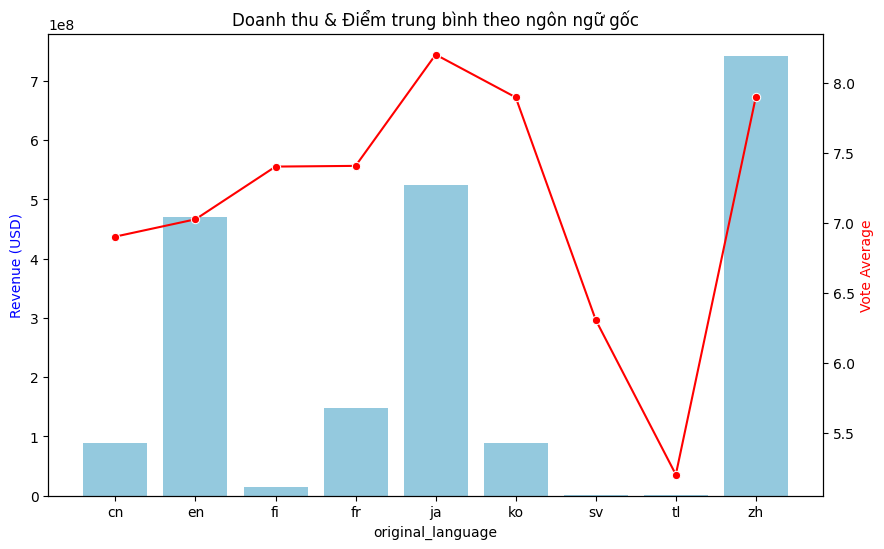

In [23]:

# Nhóm theo ngôn ngữ gốc và tính trung bình revenue, vote_average
lang_group = df.groupby("original_language")[["revenue","vote_average"]].mean().reset_index()

# Vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(10,6))

# Doanh thu
sns.barplot(data=lang_group, x="original_language", y="revenue", ax=ax1, color="skyblue")
ax1.set_ylabel("Revenue (USD)", color="blue")

# Thêm trục y thứ 2 cho vote_average
ax2 = ax1.twinx()
sns.lineplot(data=lang_group, x="original_language", y="vote_average", ax=ax2, color="red", marker="o")
ax2.set_ylabel("Vote Average", color="red")

plt.title("Doanh thu & Điểm trung bình theo ngôn ngữ gốc")
plt.show()



* Biểu đồ: Khi phân tích giá trị trung bình theo ngôn ngữ gốc (original_language), có một số điểm đáng chú ý như sau:
  - Ngôn ngữ Trung Quốc (zh) có doanh thu trung bình cao nhất, đạt khoảng 730 triệu USD, dù trước đó chỉ xếp thứ hai nếu xét theo giá trị doanh thu cao nhất. Điều này cho thấy các phim ngôn ngữ Trung được thị trường ưa chuộng, với hiệu suất trung bình rất tốt.
  - Ngôn ngữ Nhật Bản (ja) có điểm đánh giá trung bình cao nhất, khoảng 8.2 điểm, thể hiện sự yêu thích và đánh giá tích cực từ khán giả. Đồng thời, doanh thu trung bình (~530 triệu USD) cũng rất ấn tượng, cho thấy sự đồng thuận giữa chất lượng và thị trường.
  - Ngôn ngữ Anh (en) duy trì sự cân bằng giữa doanh thu (~480 triệu USD) và điểm đánh giá (~7.0 điểm). Điều này cho thấy các bộ phim tiếng Anh có chất lượng ổn định và được khán giả Việt Nam đón nhận tích cực.
  - Một số ngôn ngữ như Phần Lan (fi), Trung Quốc (cn) và Hàn Quốc (ko) có điểm đánh giá trung bình khá cao (~6.9 - 7.9 điểm) nhưng doanh thu lại thấp hơn đáng kể. Điều này cho thấy có thể các phim này được đánh giá tốt nhưng chưa tiếp cận được đông đảo khán giả, hoặc có hạn chế trong khâu phát hành/marketing.
  - Ngôn ngữ Thụy Điển (sv) có điểm đánh giá trung bình ở mức khá (~6.3 điểm) nhưng doanh thu trung bình gần như không đáng kể, cho thấy mức độ phổ biến và phân phối phim còn hạn chế.
  - Ngôn ngữ Thái Lan (tl) có mức doanh thu và điểm đánh giá đều thấp, cho thấy các bộ phim tiếng Thái có thể chưa tạo được dấu ấn lớn tại thị trường.
  

In [25]:
# 2.2 Ngân sách (Budget) ảnh hưởng đến doanh thu (revenue) và điểm đánh giá (vote_average)
# Nhóm theo ngân sách → xem ngôn ngữ nào có revenue/vote cao hơn
revenue_bybudget = df.groupby('budget')['revenue'].max()
vote_bybudget = df.groupby('budget')['vote_average'].max()
print(f"Doanh thu nhóm theo ngân sách: {revenue_bybudget}")
print(f"Điểm đánh giá nhóm theo ngân sách: {vote_bybudget}")



Doanh thu nhóm theo ngân sách: budget
22361            721651
35000            421798
200000            11575
1000000        15113105
1500000       100106454
                ...    
356000000    2799439100
365000000    1405403694
379000000    1046721266
416000000    1074144248
583900000    1004004592
Name: revenue, Length: 134, dtype: int64
Điểm đánh giá nhóm theo ngân sách: budget
22361        5.200
35000        6.345
200000       5.600
1000000      6.741
1500000      6.942
             ...  
356000000    8.238
365000000    7.271
379000000    6.562
416000000    6.283
583900000    6.634
Name: vote_average, Length: 134, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_15080\2235486020.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_group = df.groupby("budget_bin")[["revenue","vote_average"]].mean().reset_index()


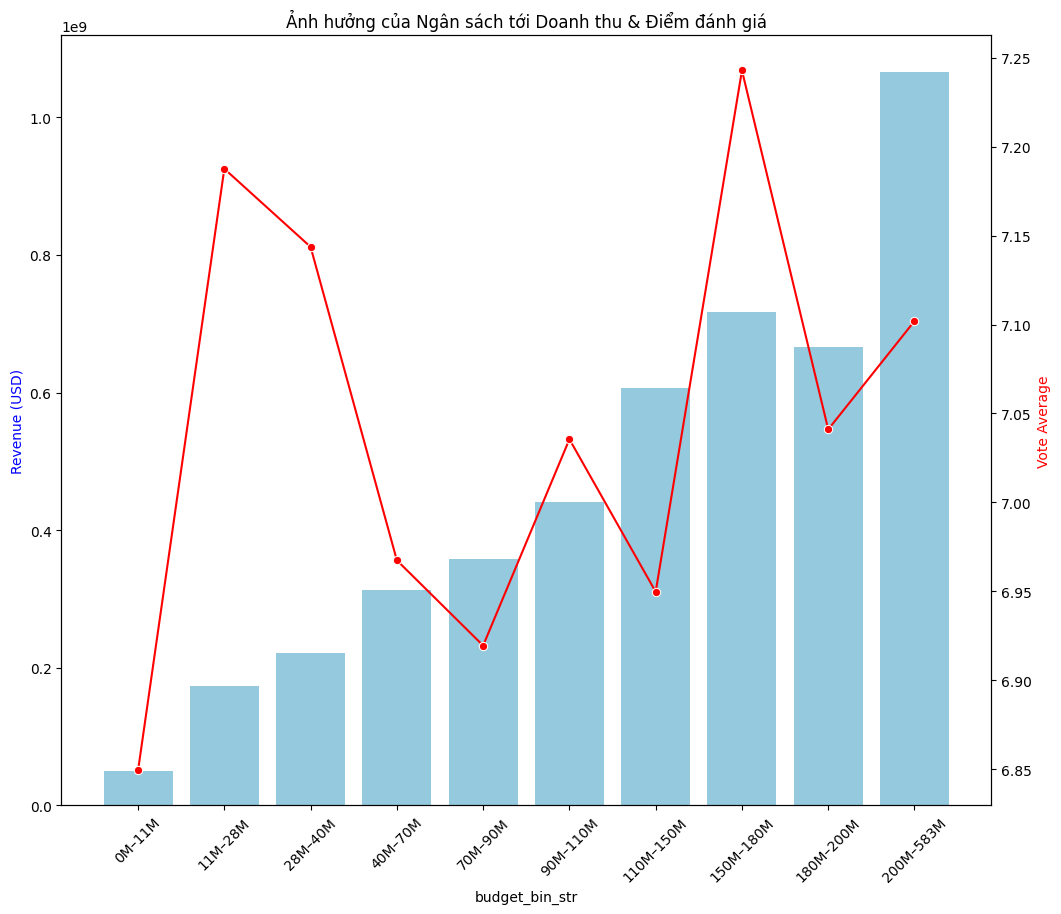

In [34]:

# Nhóm theo ngân sách và tính trung bình revenue, vote_average
# Chia ngân sách thành 10 nhóm (bins)
df["budget_bin"] = pd.qcut(df["budget"], q=10, duplicates="drop")

# Nhóm theo bin
budget_group = df.groupby("budget_bin")[["revenue","vote_average"]].mean().reset_index()
# Rút gọn biểu diễn của Interval thành chuỗi tóm tắt
def simplify_interval(interval):
    return f"{int(interval.left/1e6)}M–{int(interval.right/1e6)}M"

budget_group["budget_bin_str"] = budget_group["budget_bin"].apply(simplify_interval)

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12,10))

# Revenue (cột xanh)
sns.barplot(data=budget_group, x="budget_bin_str", y="revenue", ax=ax1, color="skyblue")
ax1.set_ylabel("Revenue (USD)", color="blue")
ax1.tick_params(axis="x", rotation=45)

# Vote Average (đường đỏ)
ax2 = ax1.twinx()
sns.lineplot(data=budget_group, x="budget_bin_str", y="vote_average", ax=ax2, color="red", marker="o")
ax2.set_ylabel("Vote Average", color="red")

plt.title("Ảnh hưởng của Ngân sách tới Doanh thu & Điểm đánh giá")
plt.xlabel("Budget Bins")
plt.show()



* Nhận xét: Từ biểu đồ "Ảnh hưởng của ngân sách tới doanh thu và điểm đánh giá", ta rút ra được một số nhận xét sau:
  - Doanh thu cao nhất (~1 tỷ USD) thuộc vào nhóm ngân sách từ 200 đến hơn 500 triệu USD, cho thấy sự đầu tư lớn về tài chính có thể giúp mở rộng phạm vi phát hành, quảng bá, và thu hút khán giả.
  - Xu hướng tổng thể cho thấy: khi ngân sách đầu tư tăng, doanh thu trung bình cũng tăng theo. Tuy không phải mọi nhóm đều tuân theo quy luật này tuyệt đối, nhưng phần lớn các nhóm có ngân sách cao đều đạt mức doanh thu vượt trội so với các nhóm ngân sách thấp.
  - Tuy nhiên, ngân sách cao không đồng nghĩa với điểm đánh giá cao. Nhóm có điểm đánh giá trung bình cao nhất lại không thuộc về nhóm ngân sách cao nhất, mà rơi vào các nhóm ngân sách trung bình hoặc thậm chí thấp hơn (ví dụ: khoảng 11-28 triệu USD. Điều này cho thấy:
    + Chất lượng nội dung không hoàn toàn phụ thuộc vào ngân sách đầu tư
    + Những phim có ngân sách thấp vẫn có thể gây ấn tượng với khán giả, có thể nhờ vào cột truyện hấp dẫn, tiêu đề gây chú ý, diễn xuất tốt, hoặc thông điệp ý nghĩa.
    